In [1]:
import pandas as pd

df = pd.read_csv('bad1.csv')
df.head()

,tx_hash,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious
0,0437cd7f8525ceed2324359c2d0ba26006d92d856a9c20...,0,1,0.0,50.0,50.0,0.0,50.0,0,0,0,0,0
1,f4184fc596403b9d638783cf57adfe4c75c605f6356fbc...,1,2,50.0,50.0,100.0,50.0,25.0,0,0,0,0,0
2,ea44e97271691990157559d0bdd9959e02790c34db6c00...,1,1,10.0,10.0,20.0,10.0,10.0,0,0,0,0,0
3,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,1,1,40.0,30.0,70.0,40.0,30.0,0,0,0,0,0
4,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,1,2,30.0,30.0,60.0,30.0,15.0,0,0,0,0,0


In [2]:
# Check for missing values
df.isnull().sum()

tx_hash                 0
indegree                0
outdegree               0
in_btc                  0
out_btc                 0
total_btc               0
mean_in_btc             0
mean_out_btc            0
in_malicious            0
out_malicious           0
is_malicious            0
out_and_tx_malicious    0
all_malicious           0
dtype: int64

<Figure size 432x288 with 0 Axes>

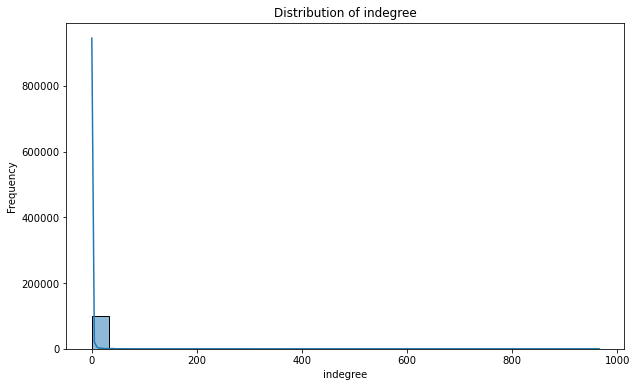

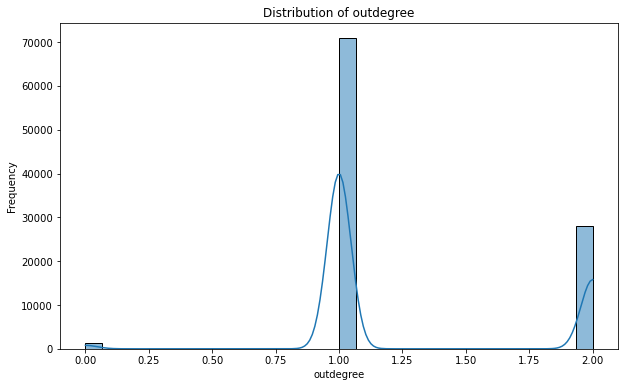

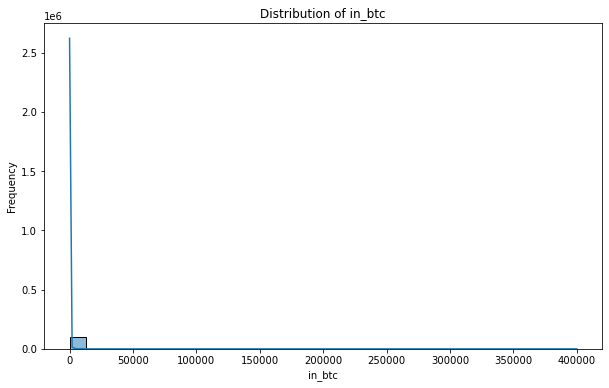

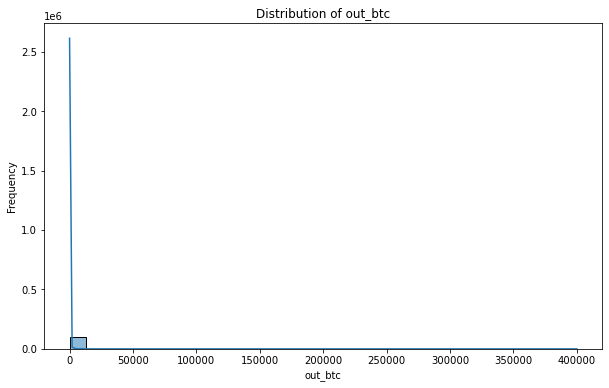

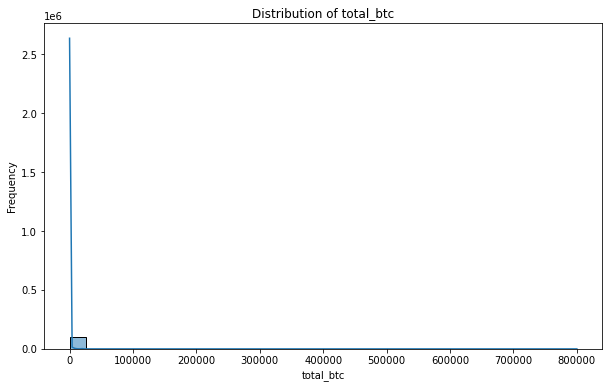

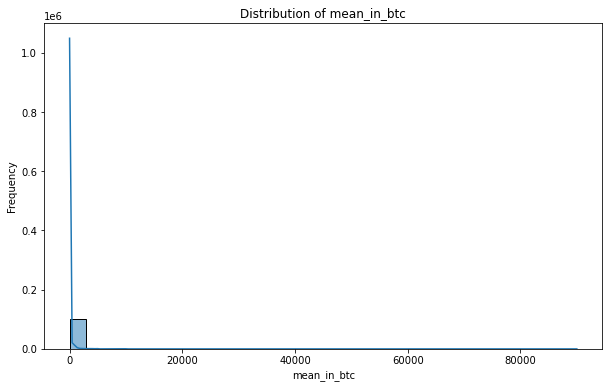

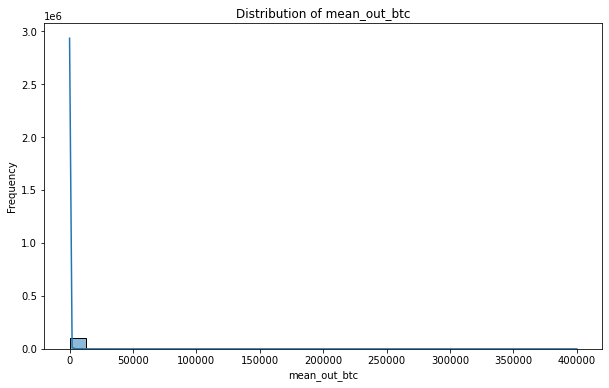

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the background color to white for visibility
plt.figure(facecolor='white')

# Select numerical columns for distribution analysis
numerical_cols = ['indegree', 'outdegree', 'in_btc', 'out_btc', 'total_btc', 'mean_in_btc', 'mean_out_btc']

# Plot distributions
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title('Distribution of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows to confirm normalization
print('Numerical columns normalized.')
df.head()

Numerical columns normalized.


,tx_hash,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious
0,0437cd7f8525ceed2324359c2d0ba26006d92d856a9c20...,-0.122207,-0.562472,-0.097154,-0.081493,-0.089661,-0.121279,-0.062446,0,0,0,0,0
1,f4184fc596403b9d638783cf57adfe4c75c605f6356fbc...,-0.023488,1.556850,-0.069773,-0.081493,-0.075826,-0.072164,-0.077941,0,0,0,0,0
2,ea44e97271691990157559d0bdd9959e02790c34db6c00...,-0.023488,-0.562472,-0.091678,-0.103722,-0.097961,-0.111456,-0.087239,0,0,0,0,0
3,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,-0.023488,-0.562472,-0.075249,-0.092607,-0.084127,-0.081987,-0.074842,0,0,0,0,0
4,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,-0.023488,1.556850,-0.080725,-0.092607,-0.086894,-0.091810,-0.084140,0,0,0,0,0


In [6]:
# Calculate the ratio of in_btc to out_btc
# Add a small constant to avoid division by zero
small_constant = 1e-9
df['btc_ratio'] = df['in_btc'] / (df['out_btc'] + small_constant)

# Calculate the difference between in_btc and out_btc
df['btc_difference'] = df['in_btc'] - df['out_btc']

print('New features created: btc_ratio, btc_difference')
df[['btc_ratio', 'btc_difference']].head()

New features created: btc_ratio, btc_difference


,btc_ratio,btc_difference
0,1.192178,-0.015661
1,0.856182,0.011720
2,0.883880,0.012044
3,0.812559,0.017358
4,0.871693,0.011882


In [7]:
from sklearn.cluster import KMeans

# Select a subset of features for clustering
features_for_clustering = ['indegree', 'outdegree', 'in_btc', 'out_btc', 'total_btc', 'mean_in_btc', 'mean_out_btc']

# Initialize KMeans with a predetermined number of clusters
# The optimal number of clusters can be determined using methods like the elbow method, but for simplicity, we'll choose 5
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit KMeans and predict cluster labels
df['cluster_label'] = kmeans.fit_predict(df[features_for_clustering])

print('K-Means clustering applied. Cluster labels added as a new feature.')
df[['cluster_label']].head()

K-Means clustering applied. Cluster labels added as a new feature.


,cluster_label
0,0
1,4
2,0
3,0
4,4
